# Heart Disease Prediction Using Logistic Regression

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs


In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Analysis of Data

In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None
        

# Removing NaN / NULL vales from the data

In [4]:
df.dropna(axis = 0, inplace = True) 
print(df.shape)


(3658, 16)


# Data Visualization with Correlation Matrix 

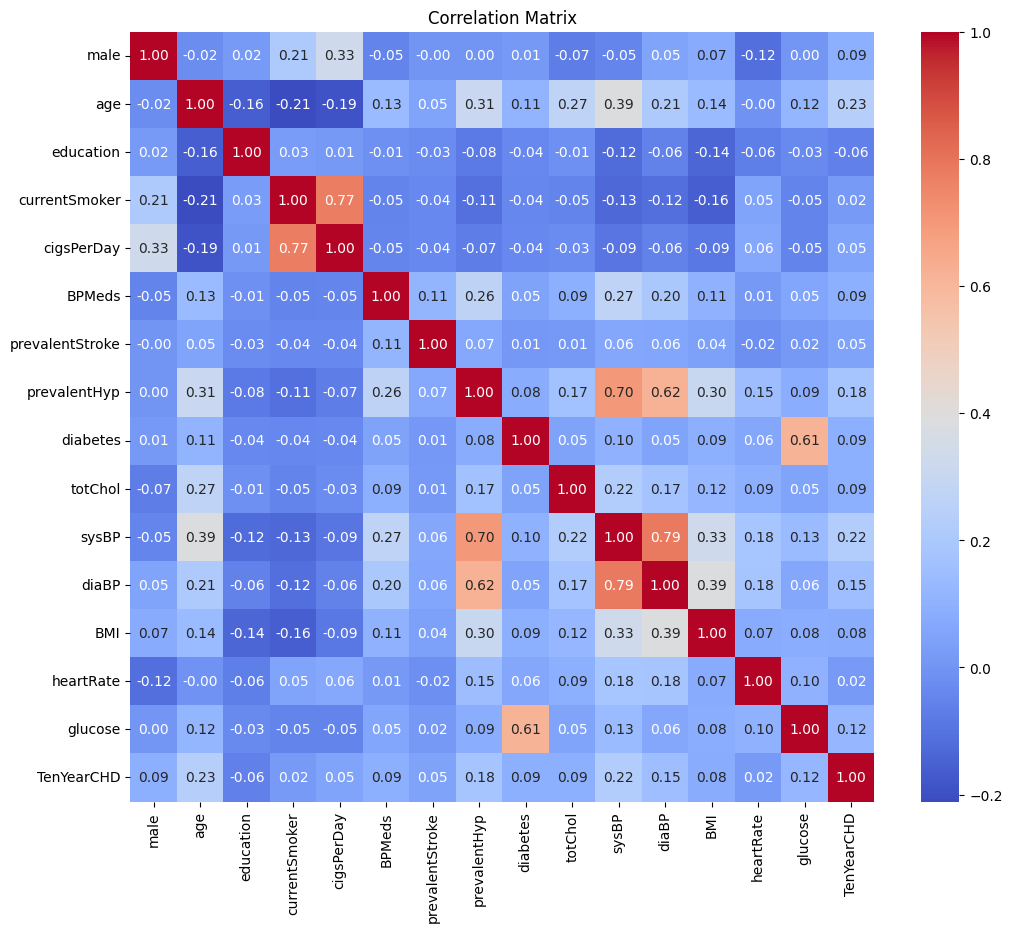

In [5]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


# Pairplot

In [ ]:
# Create pairplot
sbs.pairplot(df)
plt.show()

# Countplot of people based on their sex and whether they are Current Smoker or not

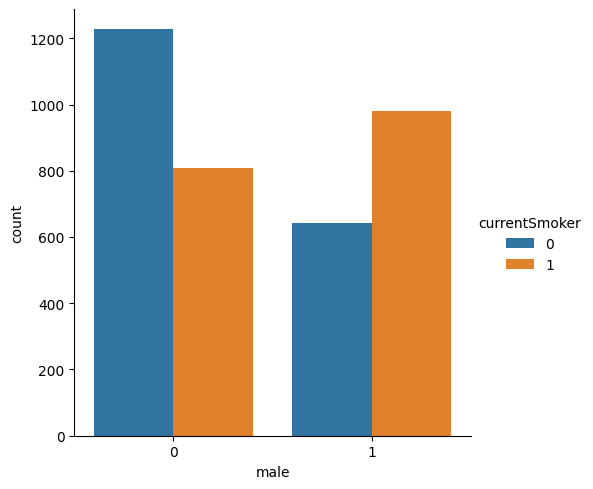

In [6]:
sbs.catplot(data=df, kind='count', x='male',hue='currentSmoker')
plt.show()

# Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.

C:\Users\vartika singh\AppData\Local\Temp\ipykernel_34032\4231351308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbs.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')


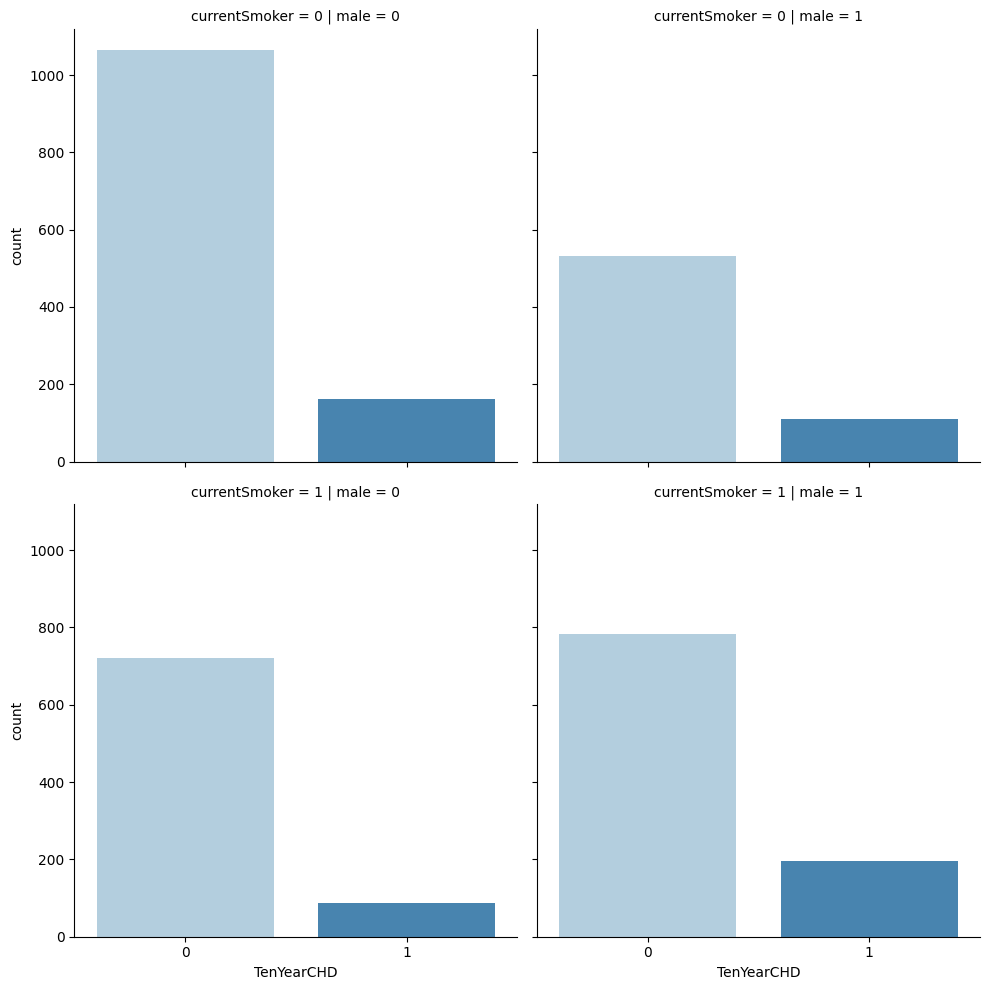

In [8]:
sbs.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')
plt.show()

# Machine Learning Part

# Separating the data into feature and target data.

In [10]:
# Features (independent variables)
X = df.drop(columns=['TenYearCHD'])

# Target (dependent variable)
Y = df['TenYearCHD']

# Display the first few rows of each DataFrame to verify separation
print("Features:")
print(X.head())

print("\nTarget:")
print(Y.head())


Features:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  

Target:
0    0
1    0
2    0
3    1
4    0
Nam

In [11]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [12]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

# Importing the model and assigning the data for training and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21)



# Applying the ML model - Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Training the data

In [26]:
logreg.fit(X_train,Y_train)

C:\Users\vartika singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the data

In [27]:
y_pred = logreg.predict(X_test)

# Predicting the score

In [29]:
score = logreg.score(X_test, Y_test)
print("Prediction score is:",score) 

Prediction score is: 0.8497267759562842


# Getting the Confusion Matrix and Classification Report

In [31]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(Y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[926   5]
 [160   7]]


In [33]:
print("Classification Report is:\n\n",classification_report(Y_test,y_pred))

Classification Report is:

               precision    recall  f1-score   support

           0       0.85      0.99      0.92       931
           1       0.58      0.04      0.08       167

    accuracy                           0.85      1098
   macro avg       0.72      0.52      0.50      1098
weighted avg       0.81      0.85      0.79      1098



# Plotting the confusion matrix

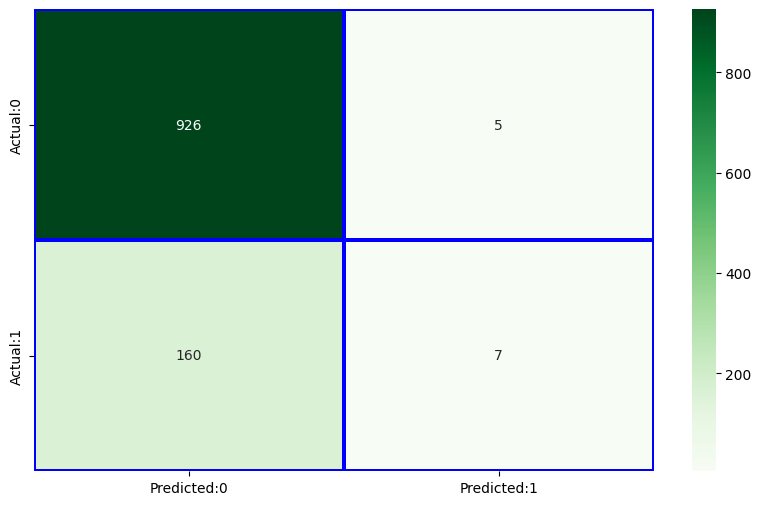

In [37]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sbs.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 